## Анализ плотности населения на Земле

### __Введение__
##### Марс давно привлекает внимание ученых и исследователей благодаря своей уникальной атмосфере и геологическим особенностям. Одной из самых захватывающих тем в марсианских исследованиях является наличие водяного и углекислого льда на поверхности планеты. Изучение этих льдов может помочь нам понять климатические условия Марса, его прошлое и потенциальные возможности для колонизации в будущем.

В этом проекте мы проведем анализ данных, собранных с помощью спектрометра SPICAM-IR, который был установлен на орбитальном аппарате Mars Express. Датасет включает информацию о местоположении, индексе углекислого льда (CO2) и водяного льда (H2O), а также других параметрах, таких как сезонные изменения и соотношение сигнала к шуму (SNR).

### __Цели проекта__

__Наши основные цели в этом анализе:__

- __идентификация областей с постоянным наличием льда:__ определение участков, где лед наблюдается постоянно на протяжении нескольких марсианских лет
- __сезонные изменения:__ исследование, как наличие льда меняется в зависимости от времени года на Марсе
- __сравнительный анализ:__ сравнение ледяных шапок на северном и южном полюсах планеты, чтобы выявить возможные различия в климатических условиях


С помощью современных инструментов визуализации данных мы стремимся не только проанализировать полученные результаты, но и представить их в понятном и наглядном виде.

### Описание
Данные для анализа были взяты на [zenodo](https://zenodo.org/records/7082889). Нам треебуется только файл __spicam_obs.csv__

- __lat:__ широта местоположения (градусы).
- __lon:__ долгота местоположения (градусы).
- __co2ice_index:__ индекс углекислого льда (от 0 до 35, значения выше 2 — детектирование льда).
- __h2oice_index:__ индекс водяного льда (от 0 до 1, значения выше 0.15 — детектирование льда).
- __ls:__ время года (градусы от 0 до 360).
- __martian_year:__ количество прошедших марсианских лет.
- __snr:__ отношение сигнала к шуму (чем выше, тем лучше).


### Описание программы


#### __Шаг 1__ Загрузка данных:

Здесь мы загружаем библиотеку pandas и считываем данные из файла __spicam_obs.csv__. Затем отображаем первые строки, чтобы получить представление о структуре данных. 

__Пример кода:__

In [1]:
import pandas as pd

# Загрузка датасета
data = pd.read_csv('data/spicam_obs.csv')

# Отображаем первые несколько строк датасета
data.head()

,orbit,spec_num,lat,lon,ls,local_time,incidence,alt_spc,co2ice_index,h2oice_index,snr,martian_year
0,SPIM_1BR_01000A02_N,1,86.31333,273.5067,107.635,10.92000,62.57000,2677.500,0.0,0.522669,69.33311,27
1,SPIM_1BR_01000A02_N,2,86.26000,275.6300,107.635,11.06000,62.49000,2668.167,0.0,0.487354,76.17016,27
2,SPIM_1BR_01000A02_N,3,86.21000,277.7033,107.635,11.20000,62.40000,2658.800,0.0,0.447733,76.59061,27
3,SPIM_1BR_01000A02_N,4,86.15000,279.7200,107.635,11.33667,62.32000,2649.500,0.0,0.406881,69.82737,27
4,SPIM_1BR_01000A02_N,5,86.08000,281.6767,107.635,11.47000,62.23333,2640.100,0.0,0.374136,67.71943,27


#### __Шаг 2__ Анализ структуры данных:

Мы используем метод __info()__, чтобы увидеть информацию о типах данных и количестве непустых значений. Метод __describe()__ предоставляет статистическую сводку, что помогает понять распределение значений и наличие аномалий.

__Пример кода:__

In [2]:
# Посмотрим на структуру данных
data.info()

# посмотрим статистическое описание
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   orbit         1048575 non-null  object 
 1   spec_num      1048575 non-null  int64  
 2   lat           1048575 non-null  float64
 3   lon           1048575 non-null  float64
 4   ls            1048575 non-null  float64
 5   local_time    1048575 non-null  float64
 6   incidence     1048575 non-null  float64
 7   alt_spc       1048575 non-null  float64
 8   co2ice_index  1048575 non-null  float64
 9   h2oice_index  1048575 non-null  float64
 10  snr           1048575 non-null  float64
 11  martian_year  1048575 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 96.0+ MB


,spec_num,lat,lon,ls,local_time,incidence,alt_spc,co2ice_index,h2oice_index,snr,martian_year
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.887042e+02,1.054829e+00,1.835616e+02,1.764949e+02,1.189779e+01,5.311198e+01,3.231151e+03,1.249681e+00,6.910814e-02,8.271861e+01,3.046080e+01
std,1.169286e+02,4.936701e+01,1.061339e+02,1.034660e+02,3.848505e+00,1.875039e+01,2.586962e+03,3.753559e+00,1.164192e-01,3.275460e+01,2.670753e+00
min,0.000000e+00,-8.951000e+01,3.333333e-03,4.000000e-03,1.000000e-02,1.066667e-01,4.000333e+02,-4.973921e+00,-1.817979e-01,2.000007e+01,2.700000e+01
25%,9.200000e+01,-3.641333e+01,8.857667e+01,9.086200e+01,9.050000e+00,3.890333e+01,1.231600e+03,-4.781155e-04,1.301290e-02,5.659572e+01,2.800000e+01
50%,1.770000e+02,6.666667e-01,1.875667e+02,1.714350e+02,1.171000e+01,5.665667e+01,2.469200e+03,1.895196e-01,2.876344e-02,8.184417e+01,3.000000e+01
75%,2.790000e+02,3.983333e+01,2.773467e+02,2.675770e+02,1.484000e+01,6.820000e+01,4.333900e+03,4.152174e-01,6.107731e-02,1.084266e+02,3.300000e+01
max,5.870000e+02,8.983000e+01,3.599967e+02,3.599660e+02,2.399333e+01,8.699667e+01,1.056967e+04,4.070299e+01,8.032175e-01,1.922560e+02,3.500000e+01


#### __Шаг 3__ Анализ индекса водяного льда:

На этом этапе мы анализируем распределение индекса водяного льда (H2O) на Марсе, используя гистограмму. Функция __plt.hist()__ создает гистограмму с 30 корзинами (__bins__) для значений индекса. Заголовок и метки осей добавляются для улучшения восприятия графика. Мы также добавляем сетку на ось Y для удобства визуализации.


__Пример кода:__

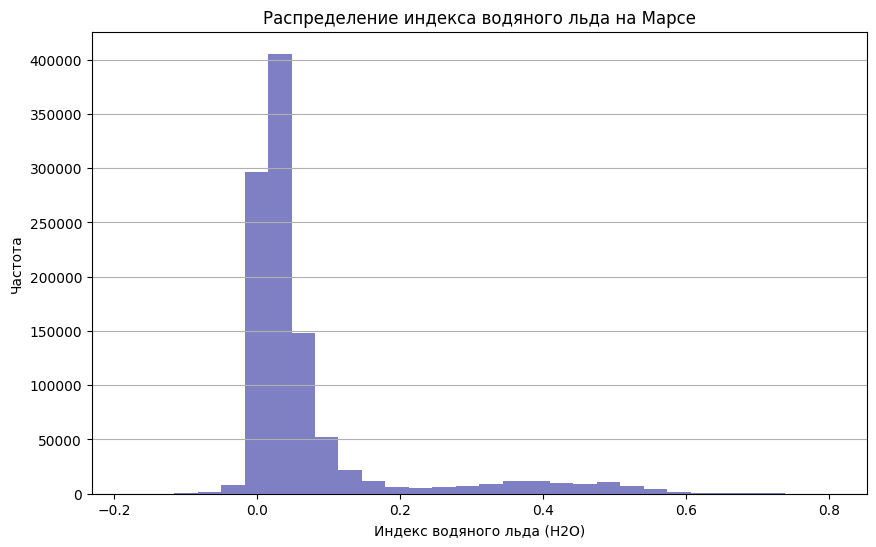

In [24]:
import matplotlib.pyplot as plt

# Построим гистограмму для индекса водяного льда
plt.figure(figsize=(10, 6))
plt.hist(data['h2oice_index'], bins=30, color='darkblue', alpha=0.5)
plt.title('Распределение индекса водяного льда на Марсе')
plt.xlabel('Индекс водяного льда (H2O)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

#### __Шаг 4__ Сравнение ледяных шапок:

  Здесь мы сравниваем индексы водяного льда на северном и южном полюсах. Мы используем фильтрацию данных, чтобы создать два новых DataFrame: один для северного полюса (широта > 0) и другой для южного полюса (широта < 0). Затем мы строим боксплот с помощью __plt.boxplot()__, чтобы визуально сравнить распределение индексов водяного льда между двумя регионами. Это позволяет увидеть различия в наличии водяного льда на полюсах.
 
__Пример кода:__

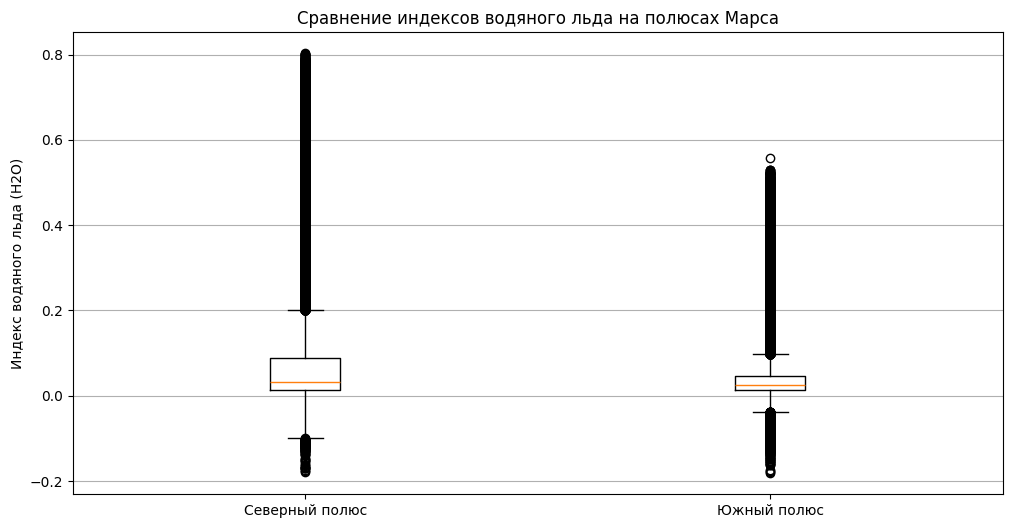

In [25]:
# Сравнение индексов льда в северном и южном полюсах
north_k = data[data['lat'] > 0]
south_k = data[data['lat'] < 0]

plt.figure(figsize=(12, 6))
plt.boxplot([north_k['h2oice_index'], south_k['h2oice_index']], labels=['Северный полюс', 'Южный полюс'])
plt.title('Сравнение индексов водяного льда на полюсах Марса')
plt.ylabel('Индекс водяного льда (H2O)')
plt.grid(axis='y')
plt.show()

#### __Шаг 5__ Визуализация сезонных изменений:

В этом шаге мы исследуем, как индекс водяного льда изменяется в зависимости от времени года (ls). Сначала мы группируем данные по значению ls и вычисляем средний индекс водяного льда для каждого сезона с помощью __groupby()__ и __mean()__. Затем строим линейный график с помощью __plt.plot()__, чтобы визуализировать изменения индекса водяного льда по сезонам. Это позволяет увидеть, как наличие водяного льда колеблется в течение марсианского года.

__Пример кода:__

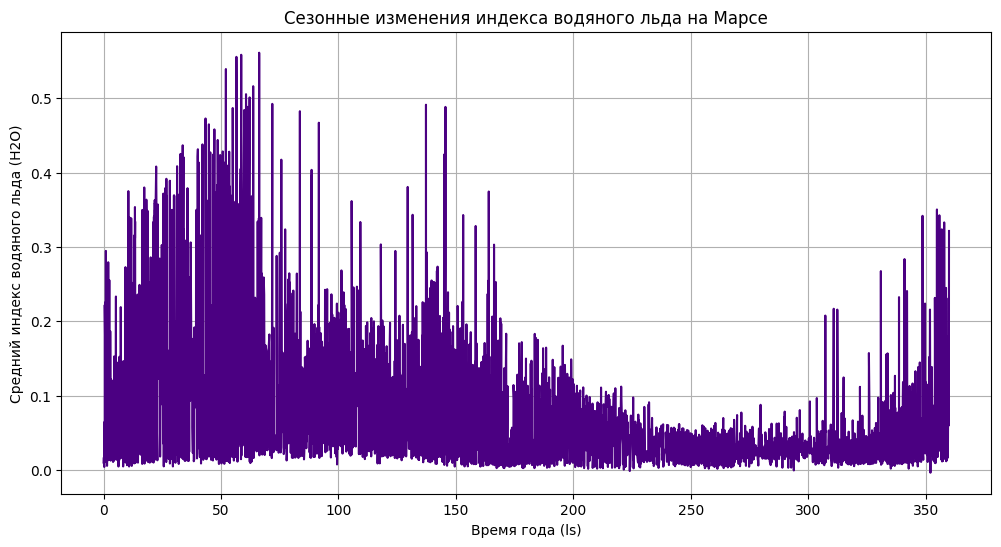

In [31]:
# Среднее значение индекса водяного льда по времени года (ls)
seasonal_ice = data.groupby('ls')['h2oice_index'].mean()
plt.figure(figsize=(12, 6))
plt.plot(seasonal_ice.index, seasonal_ice.values, color='indigo')
plt.title('Сезонные изменения индекса водяного льда на Марсе')
plt.xlabel('Время года (ls)')
plt.ylabel('Средний индекс водяного льда (H2O)')
plt.grid()
plt.show()

#### __Шаг 6__ Определение областей с постоянным наличием льда:

Здесь мы выявляем области на Марсе, где присутствует лед. Мы используем фильтрацию данных для создания нового DataFrame, в который попадают записи с индексом CO2 льда больше 2 или индексом H2O льда больше 0.15. Затем строим рассеянный график с помощью __plt.scatter()__, где долгота и широта служат осями. Этот график визуализирует области, где лед обнаруживается постоянно, что может быть полезно для дальнейших исследований.

__Пример кода:__

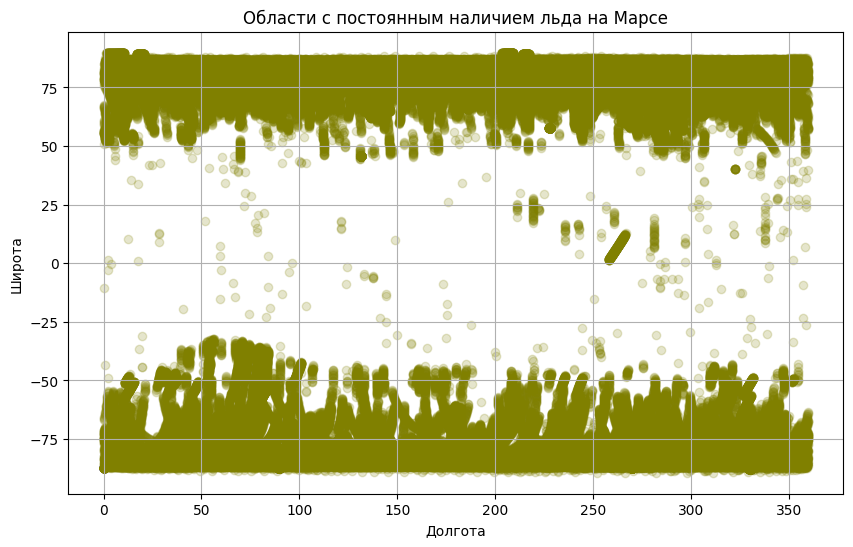

In [32]:
# Определяем области, где CO2 и H2O лед присутствует постоянно
perm_ice = data[(data['co2ice_index'] > 2) | (data['h2oice_index'] > 0.15)]

plt.figure(figsize=(10, 6))
plt.scatter(perm_ice['lon'], perm_ice['lat'], alpha=0.2, color='olive')
plt.title('Области с постоянным наличием льда на Марсе')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid()
plt.show()

#### __Шаг 7__ Сравнение соотношения сигнал/шум (SNR):

В этом шаге мы исследуем зависимость между индексами льда и отношением сигнала к шуму (SNR). Мы создаем рассеянный график, который показывает, как SNR меняется в зависимости от индекса H2O и CO2 льда. Используя __plt.scatter()__, мы отображаем данные с разными цветами для каждого типа льда. Это позволяет визуализировать качество данных и оценить, как уровень сигнала влияет на обнаружение льда.

__Пример кода:__

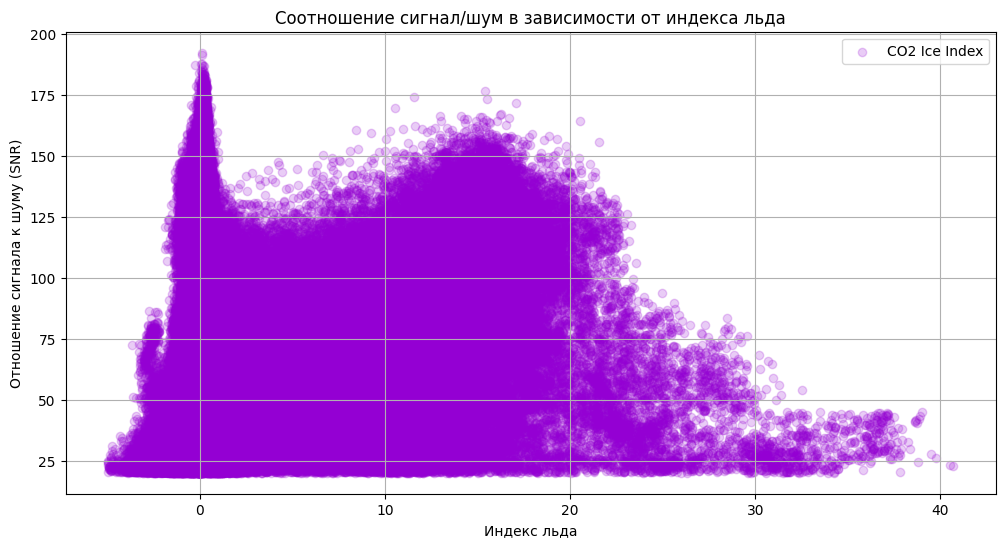

In [34]:
# Построение графика SNR для различных индексов льда
plt.figure(figsize=(12, 6))
plt.scatter(data['co2ice_index'], data['snr'], alpha=0.2, color='darkviolet', label='CO2 Ice Index')
plt.title('Соотношение сигнал/шум в зависимости от индекса льда')
plt.xlabel('Индекс льда')
plt.ylabel('Отношение сигнала к шуму (SNR)')
plt.legend()
plt.grid()
plt.show()

#### __Шаг 8__ Анализ зависимости индекса льда от марсианского года:

В последнем шаге мы анализируем, как средний индекс водяного льда меняется с течением марсианских лет. Мы группируем данные по марсианским годам и вычисляем среднее значение индекса водяного льда. Затем строим линейный график, чтобы увидеть долгосрочные тенденции и изменения в наличии водяного льда на Марсе. Это может помочь выявить, как климатические условия на планете изменяются со временем.

__Пример кода:__

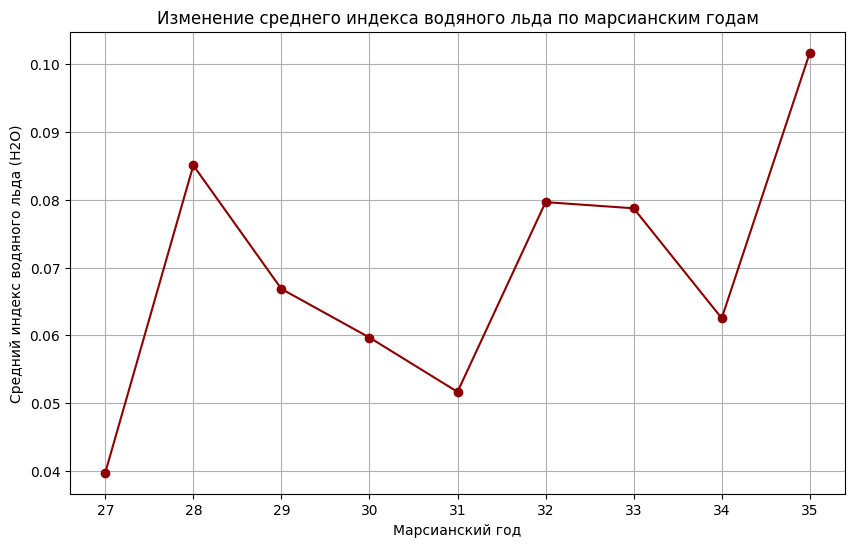

In [35]:
# Средний индекс водяного льда по марсианским годам
avg_year = data.groupby('martian_year')['h2oice_index'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_year.index, avg_year.values, marker='o', color='darkred')
plt.title('Изменение среднего индекса водяного льда по марсианским годам')
plt.xlabel('Марсианский год')
plt.ylabel('Средний индекс водяного льда (H2O)')
plt.grid()
plt.show()